HW6

Unsupervised Test Normalized
Previously it was done for Raw data, here we'll do it again for Normalized Data

NOTE : Here data is Normalized. Also M=1 (a single Monte Iteration is performed)

Everything same as Unsupervised Test, except that data has been whole once NORMALIZED

Unsupervised Test Normalized

In [620]:
import pandas as pd
import numpy as np

df = pd.read_csv('wdbc.csv', header = None)


output = df.iloc[:,0]


for i in np.arange(0,df.shape[0]):
    if output.iloc[i] == 'B':
        output.iloc[i] = 0
    else:
        output.iloc[i] = 1



features = df.iloc[:,1:]


from sklearn.preprocessing import normalize

features_normal = normalize(features)


features_normal_df = pd.DataFrame(features_normal)


norm_whole = pd.concat([features_normal_df,output],axis=1)


col_head = norm_whole.columns


norm_whole.columns= ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','y']


norm_whole.sort_values(by=['y'],inplace=True)


norm_whole.reset_index(drop=True,inplace=True)


X_y_0 = norm_whole.iloc[0:357,:]
X_y_1 = norm_whole.iloc[357:569,:]
X_y_1.reset_index(drop=True,inplace=True)


from sklearn.model_selection import train_test_split

X_y_train_0,X_y_test_0 = train_test_split(X_y_0,test_size = 0.2,shuffle=True)
X_y_train_1,X_y_test_1 = train_test_split(X_y_1,test_size = 0.2,shuffle=True)



X_y_train = pd.concat([X_y_train_0,X_y_train_1],axis=0)
X_y_test = pd.concat([X_y_test_0,X_y_test_1],axis=0)


from sklearn.utils import shuffle

X_y_train = shuffle(X_y_train)
X_y_test = shuffle(X_y_test)



X_y_train.reset_index(drop=True,inplace=True)
X_y_test.reset_index(drop=True,inplace=True)


X_train = X_y_train.drop(columns=['y'])
X_test = X_y_test.drop(columns=['y'])
y_train = X_y_train['y'].astype(int)
y_test =  X_y_test['y'].astype(int)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


           X1        X2        X3        X4        X5        X6        X7  \
0    0.014765  0.025524  0.095075  0.633546  0.000086  0.000073  0.000050   
1    0.016099  0.021259  0.102610  0.660567  0.000088  0.000055  0.000053   
2    0.014886  0.020254  0.095846  0.614363  0.000113  0.000090  0.000044   
3    0.012420  0.018966  0.081663  0.509882  0.000097  0.000134  0.000092   
4    0.011236  0.014977  0.073840  0.563050  0.000070  0.000089  0.000073   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.013725  0.023669  0.088178  0.622552  0.000077  0.000067  0.000038   
450  0.014019  0.019862  0.091521  0.569049  0.000123  0.000131  0.000131   
451  0.012904  0.011880  0.083387  0.639594  0.000076  0.000068  0.000044   
452  0.014822  0.022449  0.094856  0.637442  0.000096  0.000073  0.000015   
453  0.018598  0.023272  0.120308  0.649325  0.000161  0.000181  0.000109   

           X8        X9       X10  ...       X21       X22       X23  \
0  

C:\Users\DHRUV\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [621]:
from sklearn.cluster import KMeans

for i in np.arange(0,10):        
    kmeans = KMeans(n_clusters=2,init='random',n_init=10).fit(X_train)   


y_train_pred_cluster = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(y_train_pred_cluster)    
print(cluster_centers)

[0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0]
[[1.64457511e-02 2.48100843e-02 1.05915397e-01 6.27211805e-01
  1.29271830e-04

In [622]:
X_train_dist_0 = kmeans.transform(X_train)[:,0]
X_train_dist_1 = kmeans.transform(X_train)[:,1]


all_indx = np.arange(0,X_train.shape[0])          

list_cluster_0 = []         
list_cluster_1 = []         

for i in all_indx:
    if y_train_pred_cluster[i] == 0:
        list_cluster_0.append(i)
    else:
        list_cluster_1.append(i)
        

dist_0_0 = X_train_dist_0[list_cluster_0]   
dist_1_1 = X_train_dist_1[list_cluster_1]   




df_0 = pd.DataFrame(np.transpose(np.array([np.array(list_cluster_0),dist_0_0])),columns=['index','distance'])
df_1 = pd.DataFrame(np.transpose(np.array([np.array(list_cluster_1),dist_1_1])),columns=['index','distance'])



df_0_srt_slc = df_0.sort_values(by=['distance'],ascending=True).iloc[0:30,:]
df_1_srt_slc = df_1.sort_values(by=['distance'],ascending=True).iloc[0:30,:]

sel_indx_0_cls = df_0_srt_slc.iloc[:,0].to_numpy().flatten().astype(int)
sel_indx_1_cls = df_1_srt_slc.iloc[:,0].to_numpy().flatten().astype(int)

print(sel_indx_0_cls)
print(sel_indx_1_cls)




[435 377 338  52 346 382  10 361 422 425 181 235  91 125 190 257 276 146
 408 446  80 412 242  59 170 134 418 104  67  61]
[219 374 288 140 405 128 336 393 304 437 184  48 378 339 113 215 139 247
 103 436 121  15 286 416 157 355 238 124  30 345]


In [623]:
y_train_read_0 = y_train[sel_indx_0_cls]
y_train_read_1 = y_train[sel_indx_1_cls]


print(y_train_read_0)
print(y_train_read_1)

435    0
377    0
338    0
52     0
346    1
382    0
10     0
361    0
422    0
425    0
181    0
235    0
91     0
125    0
190    0
257    0
276    0
146    0
408    0
446    0
80     0
412    0
242    0
59     0
170    0
134    0
418    0
104    0
67     0
61     0
Name: y, dtype: int32
219    1
374    1
288    1
140    1
405    1
128    1
336    1
393    1
304    1
437    1
184    1
48     1
378    1
339    1
113    1
215    1
139    1
247    1
103    1
436    1
121    1
15     1
286    1
416    1
157    1
355    1
238    1
124    1
30     0
345    1
Name: y, dtype: int32


In [624]:
import math
pol_thrsh = 0.5 

read_labels_0 = y_train_read_0.to_numpy().flatten()   
read_labels_1 = y_train_read_1.to_numpy().flatten()  

pol_num_0 = math.floor(pol_thrsh*read_labels_0.size)     
pol_num_1 = math.floor(pol_thrsh*read_labels_1.size)    


pol_cnt_c0_0 = 0                    
pol_cnt_c1_0 = 0                    


for i in np.arange(0,read_labels_0.size):
    if read_labels_0[i] == 0:
        pol_cnt_c0_0 = pol_cnt_c0_0 + 1
        

if pol_cnt_c0_0 > pol_num_0:
    clus_0 = 0
else:
    clus_0 = 1
    


for i in np.arange(0,read_labels_1.size):
    if read_labels_1[i] == 0:
        pol_cnt_c1_0 = pol_cnt_c1_0 + 1
        

if pol_cnt_c1_0 > pol_num_1:
    clus_1 = 0
else:
    clus_1 = 1
    

    
print(clus_0)
print(clus_1)




0
1


In [625]:
y_train_pred = np.zeros(X_train.shape[0])

for i in np.arange(0,X_train.shape[0]):
    if y_train_pred_cluster[i] == 0:
        y_train_pred[i] = clus_0
    else:
        y_train_pred[i] = clus_1
        
y_train_pred = y_train_pred.astype(int)
print(y_train_pred)

[0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0]


TRAINING SCORES

In [626]:
mis = 0
for l in np.arange(0,X_train.shape[0]):
    if y_train_pred[l] != y_train.iloc[l]:
        mis = mis + 1

train_error = (mis/X_train.shape[0])*100
print('The training error is : \n',train_error,'%')

The training error is : 
 11.45374449339207 %


In [627]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train,y_train_pred)

print('The confusion matrix for training is : \n',confusion_matrix_train)

The confusion matrix for training is : 
 [[281   4]
 [ 48 121]]


In [628]:
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for train, appropriately indexed is : \n',confusion_matrix_train_df)

The confusion matrix for train, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0          281            4
Actually 1           48          121


In [629]:
precision_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[0][1]))*100
recall_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]))*100

print('The precision for train is : \n',precision_train,'%')
print('The recall for train is : \n',recall_train,'%')

The precision for train is : 
 96.8 %
The recall for train is : 
 71.59763313609467 %


In [630]:
accuracy_train = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/(confusion_matrix_train[0][0]+confusion_matrix_train[1][1]+confusion_matrix_train[0][1]+confusion_matrix_train[1][0]))*100
f1_train = ((2*(precision_train/100)*(recall_train/100))/((precision_train/100)+(recall_train/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for training is : \n',accuracy_train,'%')
print('The f1 score for training is : \n',f1_train)

The accuracy for training is : 
 88.54625550660793 %
The f1 score for training is : 
 0.8231292517006804


TEST SCORES

In [631]:
y_test_pred_cluster = kmeans.predict(X_test)

print(y_test_pred_cluster)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0]


In [632]:
y_test_pred = np.zeros(X_test.shape[0])
for i in np.arange(0,X_test.shape[0]):
    if y_test_pred_cluster[i] == 0:
        y_test_pred[i] = clus_0
    else:
        y_test_pred[i] = clus_1

y_test_pred = y_test_pred.astype(int)
print(y_test_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0]


In [633]:
mis = 0
for l in np.arange(0,X_test.shape[0]):
    if y_test_pred[l] != y_test.iloc[l]:
        mis = mis + 1

test_error = (mis/X_test.shape[0])*100
print('The test error is obtained : \n',test_error,'%')

The test error is obtained : 
 15.65217391304348 %


In [634]:
confusion_matrix_test = confusion_matrix(y_test,y_test_pred)

print('The confusion matrix for test is : \n',confusion_matrix_test)

The confusion matrix for test is : 
 [[71  1]
 [17 26]]


In [635]:
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for test, appropriately indexed is : \n',confusion_matrix_test_df)

The confusion matrix for test, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0           71            1
Actually 1           17           26


In [636]:
precision_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[0][1]))*100
recall_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]))*100

print('The precision for test is : \n',precision_test,'%')
print('The recall for test is : \n',recall_test,'%')

The precision for test is : 
 96.29629629629629 %
The recall for test is : 
 60.46511627906976 %


In [637]:
accuracy_test = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/(confusion_matrix_test[0][0]+confusion_matrix_test[1][1]+confusion_matrix_test[0][1]+confusion_matrix_test[1][0]))*100
f1_test = ((2*(precision_test/100)*(recall_test/100))/((precision_test/100)+(recall_test/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for test is : \n',accuracy_test,'%')
print('The f1 score for test is : \n',f1_test)

The accuracy for test is : 
 84.34782608695653 %
The f1 score for test is : 
 0.7428571428571429


ROC and AUC for Train and Test

Again, the code of pol_thrsh will be used here to obtain to ROC and AUC, both, for test as well as for train

In [638]:
pol_thrsh_ra_range = np.arange(0,1.01,0.01)  
ROC_df = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])
ROC_df_test = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])



for ra in np.arange(0,pol_thrsh_ra_range.size):
    
    pol_thrsh_ra = pol_thrsh_ra_range[ra]
    
    pol_num_0_ra = math.floor(pol_thrsh_ra*read_labels_0.size)    
    pol_num_1_ra = math.floor(pol_thrsh_ra*read_labels_1.size)
    
    pol_cnt_c0_0_ra = 0                    
    pol_cnt_c1_0_ra = 0                    


    for i in np.arange(0,read_labels_0.size):
        if read_labels_0[i] == 0:
            pol_cnt_c0_0_ra = pol_cnt_c0_0_ra + 1


    if pol_cnt_c0_0_ra > pol_num_0_ra:
        clus_0_ra = 0
    else:
        clus_0_ra = 1



    for i in np.arange(0,read_labels_1.size):
        if read_labels_1[i] == 0:
            pol_cnt_c1_0_ra = pol_cnt_c1_0_ra + 1


    if pol_cnt_c1_0_ra > pol_num_1_ra:
        clus_1_ra = 0
    else:
        clus_1_ra = 1



    
    y_train_pred_ra = np.zeros(X_train.shape[0])

    for i in np.arange(0,X_train.shape[0]):
        if y_train_pred_cluster[i] == 0:
            y_train_pred_ra[i] = clus_0_ra
        else:
            y_train_pred_ra[i] = clus_1_ra

    y_train_pred_ra = y_train_pred_ra.astype(int)
    
    
    
    
    
    
    
    
    y_test_pred_ra = np.zeros(X_test.shape[0])
    for i in np.arange(0,X_test.shape[0]):
        if y_test_pred_cluster[i] == 0:
            y_test_pred_ra[i] = clus_0_ra
        else:
            y_test_pred_ra[i] = clus_1_ra

    y_test_pred_ra = y_test_pred_ra.astype(int)
    
    # _ra everywhere to ensure distinction and localisation to this ROC and AUC section
    # this avoids any variable conflicts
    
    
    confusion_matrix_train_ra = confusion_matrix(y_train,y_train_pred_ra)
    ROC_df.iloc[ra,0] = confusion_matrix_train_ra[0][1]/(confusion_matrix_train_ra[0][1]+confusion_matrix_train_ra[0][0])
    ROC_df.iloc[ra,1] = confusion_matrix_train_ra[1][1]/(confusion_matrix_train_ra[1][1]+confusion_matrix_train_ra[1][0])
    
    
    confusion_matrix_test_ra = confusion_matrix(y_test,y_test_pred_ra)
    ROC_df_test.iloc[ra,0] = confusion_matrix_test_ra[0][1]/(confusion_matrix_test_ra[0][1]+confusion_matrix_test_ra[0][0])
    ROC_df_test.iloc[ra,1] = confusion_matrix_test_ra[1][1]/(confusion_matrix_test_ra[1][1]+confusion_matrix_test_ra[1][0])

    


    
print(ROC_df)
print(ROC_df_test)

            FPR       TPR
0.00          0         0
0.01          0         0
0.02          0         0
0.03          0         0
0.04  0.0140351  0.715976
...         ...       ...
0.96  0.0140351  0.715976
0.97          1         1
0.98          1         1
0.99          1         1
1.00          1         1

[101 rows x 2 columns]
            FPR       TPR
0.00          0         0
0.01          0         0
0.02          0         0
0.03          0         0
0.04  0.0138889  0.604651
...         ...       ...
0.96  0.0138889  0.604651
0.97          1         1
0.98          1         1
0.99          1         1
1.00          1         1

[101 rows x 2 columns]


Text(0, 0.5, 'TPR for Train')

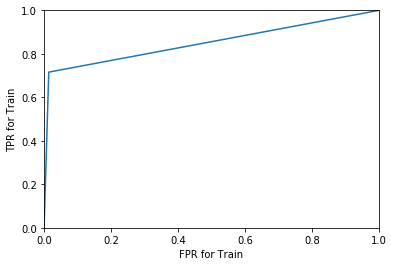

In [639]:
import matplotlib.pyplot as plt
plt.plot(ROC_df['FPR'],ROC_df['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Train')
plt.ylabel('TPR for Train')

Text(0, 0.5, 'TPR for Test')

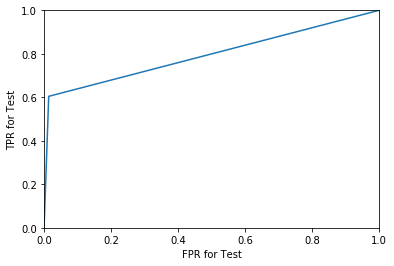

In [640]:
plt.plot(ROC_df_test['FPR'],ROC_df_test['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Test')
plt.ylabel('TPR for Test')

In [641]:
from sklearn import metrics

AUC_train = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])
print('The AUC for train is : \n',AUC_train)

The AUC for train is : 
 0.8509706218208242


In [642]:
AUC_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])
print('The AUC for test is : \n',AUC_test)

The AUC for test is : 
 0.7953811369509045


All this, again, exactly like Unsupervised Test, except that data has been once whole normalized